# Logistic Regression on Titanic Data

## Preparing the libraries and data

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-dark')

**Importing data**

In [2]:
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\CODING-SAMURAI-INTERNSHIP-TASK\Logistic Regression on Titanic Dataset\titanic train.csv")

In [3]:
test=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\CODING-SAMURAI-INTERNSHIP-TASK\Logistic Regression on Titanic Dataset\titanic test.csv")

**Checking basic data statistics**

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [9]:
data.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Modification, Univariate analysis of data

In [10]:
data.columns=data.columns.str.lower()

In [11]:
print('Null values are present in: ')
(data.isnull().sum()[data.isnull().sum()>1].reset_index())

Null values are present in: 


,index,0
0,age,177
1,cabin,687
2,embarked,2


**Passenger ID**

In [12]:
data['passengerid'].nunique()

891

In [13]:
print('id with duplicate entries: ')
len(data['passengerid'].value_counts()[data['passengerid'].value_counts()>1])

id with duplicate entries: 


0

`There are all uniqe passenger ids`

**Passenger Class**

In [14]:
data['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

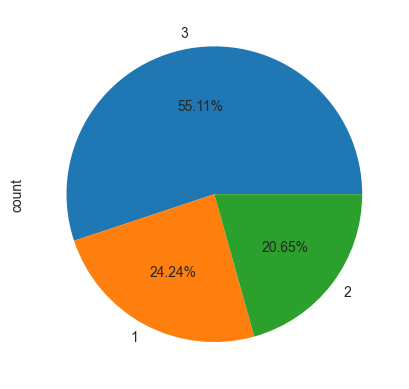

In [15]:
data['pclass'].value_counts().plot(kind='pie',labels=data['pclass'].value_counts().index,autopct="%.2f%%")
plt.show()

`There are 3 pclasses available, and pclass 3 have more than 50% of values`

**Sex**

In [16]:
data['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

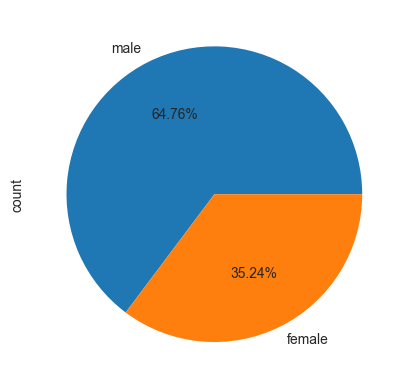

In [17]:
data['sex'].value_counts().plot(kind='pie',labels=data['sex'].value_counts().index,autopct="%.2f%%")
plt.show()

`There is no wrong entries in sex column, and 65% of passengers are of male gender`

**Age**

In [18]:
data['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [19]:
data[data['age']==.42]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [20]:
data[data['age']<1]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


<Axes: xlabel='age', ylabel='Density'>

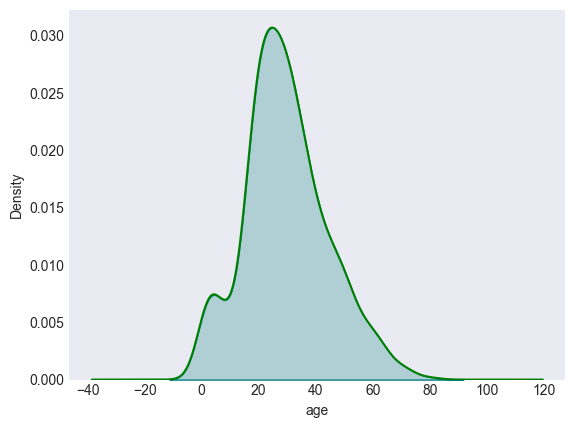

In [21]:
sns.kdeplot(data['age'],color='teal',fill=True)
data['age'].apply(lambda x: 1 if x<1 else x).plot(kind='kde',color='green')

`Capping the lower limit of age to 1 does not change the distribution at all, so capping the minimum age to 1`

In [22]:
data['age']=data['age'].apply(lambda x: 1 if x<1 else x)

In [23]:
data.corr(numeric_only=True)['age']

passengerid    0.036992
survived      -0.077035
pclass        -0.369290
age            1.000000
sibsp         -0.308288
parch         -0.189040
fare           0.096057
Name: age, dtype: float64

`There is some corelation between parch, sibsp and p class with age`

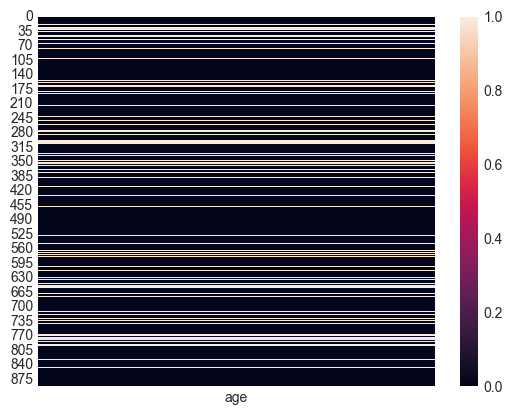

In [24]:
sns.heatmap(data['age'].isnull().to_frame())
plt.show()

`We can see age is missing completely at random`

<Axes: xlabel='age', ylabel='Density'>

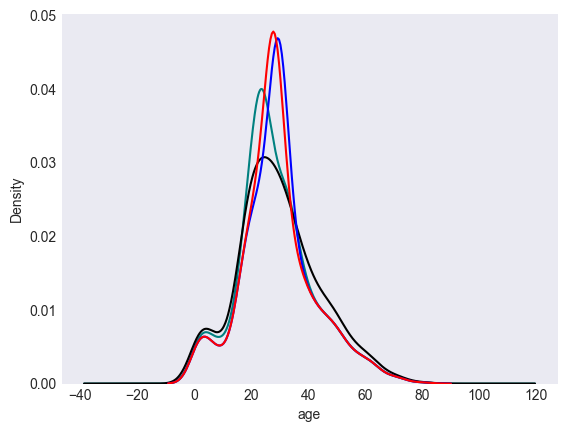

In [25]:
from sklearn.impute import KNNImputer

knn_imputer=KNNImputer()

mean_age=data['age'].mean()
median_age=data['age'].median()

imp_cols=['pclass','sibsp','parch','age']

imputed_values=knn_imputer.fit_transform(data[imp_cols])
imputed_df=pd.DataFrame(imputed_values,columns=imp_cols)

imputed_df['age'].plot(kind='kde',color='teal')
data['age'].plot(kind='kde',color='black')
sns.kdeplot(data['age'].fillna(mean_age),color='blue')
sns.kdeplot(data['age'].fillna(median_age),color='red')

`We can see that using knn imputer with some related column to fill null values are changing the distribution less, so we can use knn imputer to impute age`

In [26]:
data['age']=imputed_df['age']

`Imputing age with knn imputer`

**SIBSP and PARCH**

In [27]:
data['sibsp'].value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [28]:
data['parch'].value_counts()

parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [29]:
data[data['parch']==6]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


In [30]:
data[data['ticket']=='CA 2144']

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [31]:
data['lastname']=data['name'].apply(lambda x: x.split(",")[0])

`Creating the lastname columns, as sibsp and parch is seeming misleading to me`

In [32]:
data['ticket']=data['ticket'].str.replace(".","")

`Replacing the "." in ticket values`

In [33]:
data['familyid']=(data['lastname']+"_"+data['ticket'])

`Suraname with same ticket can be considered as same family`

In [34]:
families=data.groupby('familyid')['passengerid'].count().reset_index()
families.columns=['familyid','membercounts']
families

,familyid,membercounts
0,Abbing_CA 5547,1
1,Abbott_CA 2673,2
2,Abelson_P/PP 3381,2
3,Adahl_C 7076,1
4,Adams_341826,1
...,...,...
734,de Mulder_345774,1
735,de Pelsmaeker_345778,1
736,del Carlo_SC/PARIS 2167,1
737,van Billiard_A/5 851,1


`Counts are considered as the count of the members`

In [35]:
data.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,lastname,familyid
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Braund,Braund_A/5 21171


In [36]:
data=data.merge(families, on='familyid', how='left')

`Merging the values with the original dataset`

In [37]:
data.head(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,lastname,familyid,membercounts
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Braund,Braund_A/5 21171,1


In [38]:
data[data['ticket']=='CA 2144']

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,lastname,familyid,membercounts
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,Goodwin,Goodwin_CA 2144,6
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,Goodwin,Goodwin_CA 2144,6
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,Goodwin,Goodwin_CA 2144,6
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,Goodwin,Goodwin_CA 2144,6
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,Goodwin,Goodwin_CA 2144,6
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,Goodwin,Goodwin_CA 2144,6


**Fare**

In [39]:
data['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [40]:
data[data['fare']==0]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,lastname,familyid,membercounts
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Leonard,Leonard_LINE,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Harrison,Harrison_112059,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Tornquist,Tornquist_LINE,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,34.2,0,0,239853,0.0,NaN,S,Parkes,Parkes_239853,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Johnson,Johnson_LINE,2
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,34.2,0,0,239853,0.0,NaN,S,Cunningham,Cunningham_239853,1
466,467,0,2,"Campbell, Mr. William",male,34.2,0,0,239853,0.0,NaN,S,Campbell,Campbell_239853,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,34.2,0,0,239854,0.0,NaN,S,Frost,Frost_239854,1
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Johnson,Johnson_LINE,2
633,634,0,1,"Parr, Mr. William Henry Marsh",male,32.8,0,0,112052,0.0,NaN,S,Parr,Parr_112052,1


`Fare 0 seems to be impossible value, so i'll replace it with np.nan`

In [41]:
data['fare']=data['fare'].apply(lambda x: np.nan if x==0 else x)

In [42]:
data['fare'].describe()

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: fare, dtype: float64

In [43]:
data[data['fare']>500]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,lastname,familyid,membercounts
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Ward,Ward_PC 17755,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Cardeza,Cardeza_PC 17755,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Lesurer,Lesurer_PC 17755,1


In [44]:
tickets=data.groupby('ticket')['passengerid'].count().reset_index()
tickets.columns=['ticket','members_per_ticket']

In [45]:
data=data.merge(tickets,on='ticket',how='left')

In [46]:
(data['fare']/data['members_per_ticket']).describe()

count    876.000000
mean      18.093595
std       21.269940
min        3.711100
25%        7.775000
50%        9.225000
75%       25.671875
max      221.779200
dtype: float64

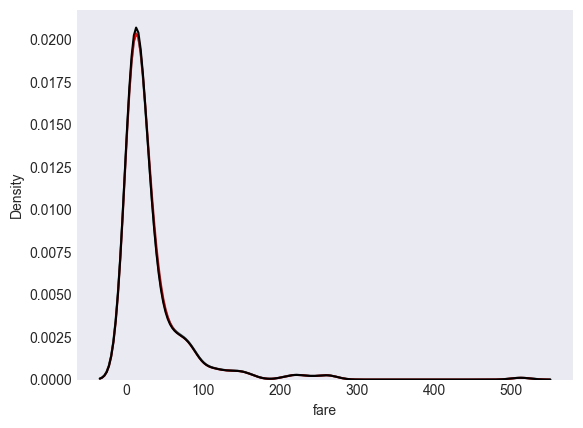

In [47]:
mean_fare=data['fare'].mean()
median_fare=data['fare'].median()

sns.kdeplot(data['fare'],color='teal')
sns.kdeplot(data['fare'].fillna(mean_fare),color='red')
sns.kdeplot(data['fare'].fillna(median_fare),color='black')

plt.show()

`We can impute the small amount of null values in fare here, as it will not change much in distribution, also we will use median value`

In [48]:
data['fare']=data['fare'].fillna(median_fare)

In [49]:
(data['fare']/data['members_per_ticket']).describe()

count    891.000000
mean      17.951727
std       21.128534
min        3.625000
25%        7.775000
50%        9.225000
75%       24.288200
max      221.779200
dtype: float64

<Axes: ylabel='Density'>

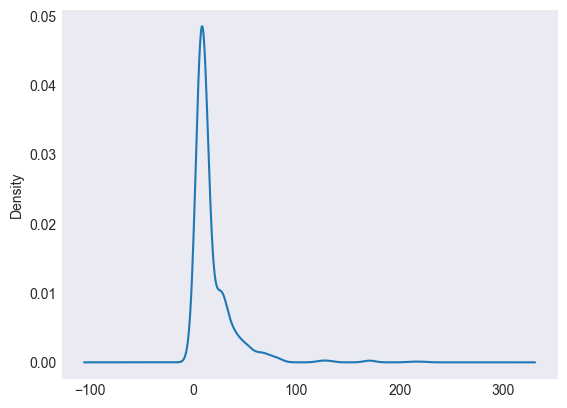

In [50]:
(data['fare']/data['members_per_ticket']).plot(kind='kde')

<Axes: ylabel='Density'>

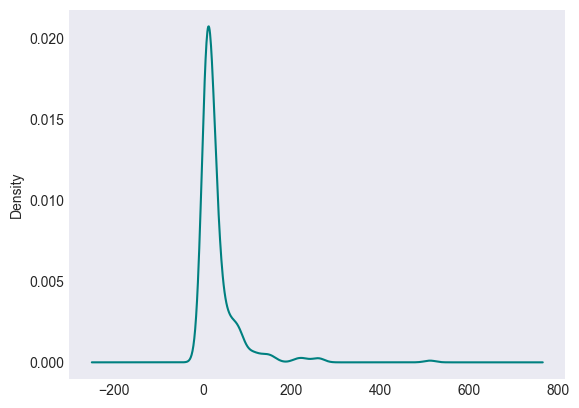

In [51]:
data['fare'].plot(kind='kde',color='teal')

`As we can see, when we decide the ticket price based on count of passenger each ticket, it takes a peak towards the lesser value`

In [52]:
data['ticketprice']=(data['fare']/data['members_per_ticket'])

In [53]:
data.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,lastname,familyid,membercounts,members_per_ticket,ticketprice
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Braund_A/5 21171,1,1,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Cumings_PC 17599,1,1,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2 3101282,7.9250,NaN,S,Heikkinen,Heikkinen_STON/O2 3101282,1,1,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Futrelle_113803,2,2,26.5500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Allen_373450,1,1,8.0500


In [54]:
(data['cabin'].isnull().sum()/len(data)*100).round(2)

np.float64(77.1)

`There are too many null values in cabin, better to remove it`

In [55]:
data.drop(columns=['passengerid','name','sibsp','parch','ticket','fare','cabin','lastname','familyid'],inplace=True)

In [56]:
data.head()

,survived,pclass,sex,age,embarked,membercounts,members_per_ticket,ticketprice
0,0,3,male,22.0,S,1,1,7.2500
1,1,1,female,38.0,C,1,1,71.2833
2,1,3,female,26.0,S,1,1,7.9250
3,1,1,female,35.0,S,2,2,26.5500
4,0,3,male,35.0,S,1,1,8.0500


In [57]:
data['travel status']=data['membercounts'].apply(lambda x: 'alone' if x==1 else 'with family')

`New column, wheather passenger was alone or with family`

In [58]:
data.head()

,survived,pclass,sex,age,embarked,membercounts,members_per_ticket,ticketprice,travel status
0,0,3,male,22.0,S,1,1,7.2500,alone
1,1,1,female,38.0,C,1,1,71.2833,alone
2,1,3,female,26.0,S,1,1,7.9250,alone
3,1,1,female,35.0,S,2,2,26.5500,with family
4,0,3,male,35.0,S,1,1,8.0500,alone


In [59]:
data['cabin status']=data['members_per_ticket'].apply(lambda x: 'single' if x==1 else 'shared')

`New column, wheather passenger was alone or with family in the cabin`

In [60]:
data.head()

,survived,pclass,sex,age,embarked,membercounts,members_per_ticket,ticketprice,travel status,cabin status
0,0,3,male,22.0,S,1,1,7.2500,alone,single
1,1,1,female,38.0,C,1,1,71.2833,alone,single
2,1,3,female,26.0,S,1,1,7.9250,alone,single
3,1,1,female,35.0,S,2,2,26.5500,with family,shared
4,0,3,male,35.0,S,1,1,8.0500,alone,single


In [61]:
data.rename(columns={'pclass':'class','membercounts':'members','members_per_ticket':'ticket members','ticketprice':'fare'},inplace=True)

`Renaming the columns`

In [62]:
data.head()

,survived,class,sex,age,embarked,members,ticket members,fare,travel status,cabin status
0,0,3,male,22.0,S,1,1,7.2500,alone,single
1,1,1,female,38.0,C,1,1,71.2833,alone,single
2,1,3,female,26.0,S,1,1,7.9250,alone,single
3,1,1,female,35.0,S,2,2,26.5500,with family,shared
4,0,3,male,35.0,S,1,1,8.0500,alone,single


In [65]:
data['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [71]:
embarked_mode=data['embarked'].mode()[0]
data['embarked']=data['embarked'].fillna(embarked_mode)

`Filling the missing values of embarked columns with mode value`

In [73]:
data.head()

,survived,class,sex,age,embarked,members,ticket members,fare,travel status,cabin status
0,0,3,male,22.0,S,1,1,7.2500,alone,single
1,1,1,female,38.0,C,1,1,71.2833,alone,single
2,1,3,female,26.0,S,1,1,7.9250,alone,single
3,1,1,female,35.0,S,2,2,26.5500,with family,shared
4,0,3,male,35.0,S,1,1,8.0500,alone,single


In [76]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
def feature_engineering(df):
    df = df.copy()

    # Make all column names lowercase
    df.columns = df.columns.str.lower()

    # Extract lastname
    df['lastname'] = df['name'].apply(lambda x: x.split(",")[0])

    # Clean ticket
    df['ticket'] = df['ticket'].str.replace(".", "", regex=False)

    # Create familyid
    df['familyid'] = df['lastname'] + "_" + df['ticket']

    # Family member counts
    families = df.groupby('familyid')['passengerid'].count().reset_index()
    families.columns = ['familyid', 'membercounts']
    df = df.merge(families, on='familyid', how='left')

    # Members per ticket
    tickets = df.groupby('ticket')['passengerid'].count().reset_index()
    tickets.columns = ['ticket', 'members_per_ticket']
    df = df.merge(tickets, on='ticket', how='left')

    # Ticket price per member
    df['ticketprice'] = df['fare'] / df['members_per_ticket']

    # Drop unnecessary columns
    df.drop(columns=[
        'passengerid', 'name', 'sibsp', 'parch', 'ticket', 
        'fare', 'cabin', 'lastname', 'familyid'
    ], inplace=True, errors='ignore')

    # Travel status
    df['travel status'] = df['membercounts'].apply(lambda x: 'alone' if x == 1 else 'with family')

    # Cabin status
    df['cabin status'] = df['members_per_ticket'].apply(lambda x: 'single' if x == 1 else 'shared')

    return df


In [85]:
feature_engineering(test)

,pclass,sex,age,embarked,membercounts,members_per_ticket,ticketprice,travel status,cabin status
0,3,male,34.5,Q,1,1,7.8292,alone,single
1,3,female,47.0,S,1,1,7.0000,alone,single
2,2,male,62.0,Q,1,1,9.6875,alone,single
3,3,male,27.0,S,1,1,8.6625,alone,single
4,3,female,22.0,S,1,1,12.2875,alone,single
...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,S,1,1,8.0500,alone,single
414,1,female,39.0,C,1,1,108.9000,alone,single
415,3,male,38.5,S,1,1,7.2500,alone,single
416,3,male,NaN,S,1,1,8.0500,alone,single
